In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [218]:
# Import data
df = pd.read_csv("sp500-data.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23691,2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000
23692,2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000
23693,2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000
23694,2022-04-28,4222.580078,4308.450195,4188.629883,4287.500000,4287.500000,3969440000


In [219]:
df["year"] = df.apply(lambda x: int(x["Date"].split("-")[0]), axis=1)

In [220]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928
...,...,...,...,...,...,...,...,...
23691,2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,2022
23692,2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,2022
23693,2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,2022
23694,2022-04-28,4222.580078,4308.450195,4188.629883,4287.500000,4287.500000,3969440000,2022


# Analyze all historical data

In [221]:
# df = df[df["Volume"] > 0]
# df = df.reset_index(drop=True)
# df

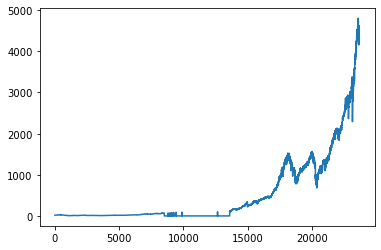

In [222]:
plt.plot(df["Open"])

In [223]:
years = []
last_opens = []
for year in range (1927, 2022):
    df_year = df[df["year"] == year]
    last_open = list(df_year["Open"])[-1]
    if last_open < 1:
        continue
    
    years.append(year)
    last_opens.append(last_open)

In [224]:
df_new = pd.DataFrame({"year": years, "last_open": last_opens})
df_new

,year,last_open
0,1927,17.660000
1,1928,24.350000
2,1929,21.450001
3,1930,15.340000
4,1931,8.120000
...,...,...
70,2017,2689.149902
71,2018,2498.939941
72,2019,3215.179932
73,2020,3733.270020


In [225]:
df_new[0:10]

,year,last_open
0,1927,17.660000
1,1928,24.350000
2,1929,21.450001
3,1930,15.340000
4,1931,8.120000
5,1932,6.920000
6,1933,9.970000
7,1934,9.500000
8,1935,13.430000
9,1936,17.180000


In [226]:
price = np.array(df_new["last_open"])
price

array([  17.65999985,   24.35000038,   21.45000076,   15.34000015,
          8.11999989,    6.92000008,    9.97000027,    9.5       ,
         13.43000031,   17.18000031,   10.55000019,   13.14000034,
         12.46000004,   10.57999992,    8.68999958,    9.77000046,
         11.67000008,   13.27999973,   17.36000061,   15.30000019,
         15.30000019,   15.19999981,   16.79000092,   20.43000031,
         23.77000046,   26.56999969,   24.80999947,   35.97999954,
         45.47999954,   46.66999817,   39.99000168,   55.20999908,
         59.88999939,   58.11000061,   71.55000305,  140.33999634,
        164.86000061,  166.25999451,  210.67999268,  243.36999512,
        247.83999634,  279.39001465,  350.67999268,  328.70999146,
        415.14001465,  438.82000732,  468.66000366,  461.17001343,
        614.11999512,  753.84997559,  970.84002686, 1231.93005371,
       1464.4699707 , 1334.2199707 , 1161.02001953,  879.39001465,
       1109.64001465, 1213.55004883, 1254.42004395, 1424.70996

In [227]:
next_price = np.roll(price, -1)[:-1]
current_price = price[:-1]

In [228]:
diff = next_price / current_price
diff

array([1.37882223, 0.88090351, 0.7151515 , 0.52933506, 0.85221677,
       1.44075147, 0.95285855, 1.41368424, 1.27922561, 0.61408615,
       1.24549764, 0.9482496 , 0.84911717, 0.82136102, 1.12428089,
       1.19447283, 1.13796055, 1.30722899, 0.88133639, 1.        ,
       0.99346403, 1.10460534, 1.21679566, 1.16348508, 1.11779551,
       0.93375987, 1.4502217 , 1.26403558, 1.02616532, 0.85686744,
       1.38059507, 1.08476726, 0.97027886, 1.23128553, 1.96142544,
       1.17471858, 1.00849202, 1.2671719 , 1.15516425, 1.0183671 ,
       1.12729995, 1.25516294, 0.93735029, 1.26293701, 1.05704098,
       1.06800054, 0.98401829, 1.33165639, 1.22752879, 1.28784249,
       1.26893208, 1.18876065, 0.91105997, 0.87018636, 0.75742881,
       1.26182922, 1.09364301, 1.03367805, 1.13575191, 1.03547391,
       0.60368753, 1.26500403, 1.1155335 , 1.00482187, 1.11055425,
       1.31386944, 1.12997874, 0.98966432, 1.09270161, 1.19432307,
       0.92926762, 1.28661753, 1.16113875, 1.27909579])

(array([ 3.,  2., 13., 16., 19., 17.,  3.,  0.,  0.,  1.]),
 array([ 52.9335059 ,  67.25440973,  81.57531355,  95.89621738,
        110.21712121, 124.53802503, 138.85892886, 153.17983269,
        167.50073651, 181.82164034, 196.14254417]),
 <BarContainer object of 10 artists>)

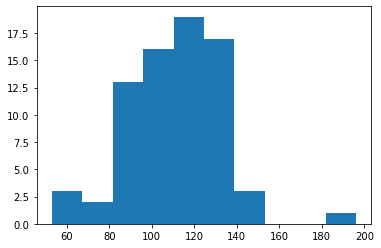

In [229]:
plt.hist(diff * 100)

In [230]:
random_returns = np.random.choice(diff, 30)
random_returns

array([1.28784249, 1.0183671 , 0.98966432, 0.85221677, 1.13796055,
       1.05704098, 1.31386944, 1.18876065, 1.13796055, 1.09270161,
       1.15516425, 1.22752879, 1.09364301, 1.30722899, 1.30722899,
       1.02616532, 0.91105997, 1.30722899, 1.13796055, 1.15516425,
       1.08476726, 0.92926762, 0.60368753, 1.16113875, 0.95285855,
       0.97027886, 0.7151515 , 1.27922561, 1.16113875, 0.75742881])

In [231]:
start_money = 100 * 1000
add_each_year = 12 * 1000
n_years = 30

n_epochs = 1000 # how many experiments do you run
expt = np.zeros((n_epochs, n_years))
for epoch in range(n_epochs):
    random_returns = np.random.choice(diff, n_years)
    money = start_money
    money_arr = []
    for year in range(n_years):
        
        money *= random_returns[year] 
        money += add_each_year
        money_arr.append(money)
    roi = money - (start_money + add_each_year * n_years)
    expt[epoch] = money_arr
    print(f"Epoch {epoch}: Final return: {money}. ROI={roi}")
    

Epoch 0: Final return: 1095573.1070330418. ROI=635573.1070330418
Epoch 1: Final return: 6018451.992683357. ROI=5558451.992683357
Epoch 2: Final return: 5385846.006660455. ROI=4925846.006660455
Epoch 3: Final return: 849368.4885009031. ROI=389368.4885009031
Epoch 4: Final return: 2075978.0817724925. ROI=1615978.0817724925
Epoch 5: Final return: 1669837.2690008415. ROI=1209837.2690008415
Epoch 6: Final return: 2030446.7548642645. ROI=1570446.7548642645
Epoch 7: Final return: 1017632.7548274945. ROI=557632.7548274945
Epoch 8: Final return: 1538494.0882819982. ROI=1078494.0882819982
Epoch 9: Final return: 1823821.4864981268. ROI=1363821.4864981268
Epoch 10: Final return: 4640824.2178057665. ROI=4180824.2178057665
Epoch 11: Final return: 2837530.3241581554. ROI=2377530.3241581554
Epoch 12: Final return: 1715718.7793071966. ROI=1255718.7793071966
Epoch 13: Final return: 4262255.877731162. ROI=3802255.877731162
Epoch 14: Final return: 970420.5364919398. ROI=510420.5364919398
Epoch 15: Final r

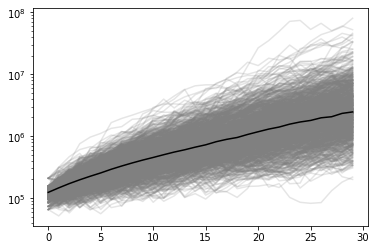

In [232]:
for i in range(n_epochs):
    plt.plot(expt[i], ls='-', alpha=0.2, color='grey')
plt.plot(np.median(expt, axis=0), alpha=1, color='black')
plt.yscale("log")

(100000.0, 10000000.0)

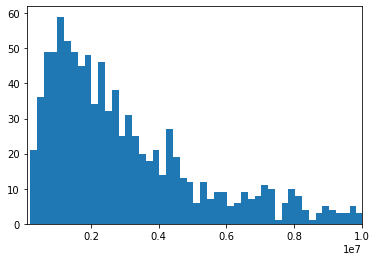

In [233]:
end_year = expt[:,-1]
plt.hist(end_year, bins=400)
plt.xlim(start_money, start_money * 100)

# Analyze historical data after 1950s

In [234]:
years = []
last_opens = []
for year in range (1950, 2022):
    df_year = df[df["year"] == year]
    last_open = list(df_year["Open"])[-1]
    if last_open < 1:
        continue
    
    years.append(year)
    last_opens.append(last_open)

In [235]:
df_new = pd.DataFrame({"year": years, "last_open": last_opens})
df_new

,year,last_open
0,1950,20.430000
1,1951,23.770000
2,1952,26.570000
3,1953,24.809999
4,1954,35.980000
5,1955,45.480000
6,1956,46.669998
7,1957,39.990002
8,1958,55.209999
9,1959,59.889999


In [236]:
df_new[0:10]

,year,last_open
0,1950,20.430000
1,1951,23.770000
2,1952,26.570000
3,1953,24.809999
4,1954,35.980000
5,1955,45.480000
6,1956,46.669998
7,1957,39.990002
8,1958,55.209999
9,1959,59.889999


In [237]:
price = np.array(df_new["last_open"])
price

array([  20.43000031,   23.77000046,   26.56999969,   24.80999947,
         35.97999954,   45.47999954,   46.66999817,   39.99000168,
         55.20999908,   59.88999939,   58.11000061,   71.55000305,
        140.33999634,  164.86000061,  166.25999451,  210.67999268,
        243.36999512,  247.83999634,  279.39001465,  350.67999268,
        328.70999146,  415.14001465,  438.82000732,  468.66000366,
        461.17001343,  614.11999512,  753.84997559,  970.84002686,
       1231.93005371, 1464.4699707 , 1334.2199707 , 1161.02001953,
        879.39001465, 1109.64001465, 1213.55004883, 1254.42004395,
       1424.70996094, 1475.25      ,  890.59002686, 1126.59997559,
       1256.76000977, 1262.81994629, 1402.43005371, 1842.60998535,
       2082.11010742, 2060.59008789, 2251.61010742, 2689.14990234,
       2498.93994141, 3215.17993164, 3733.27001953, 4775.20996094])

In [238]:
next_price = np.roll(price, -1)[:-1]
current_price = price[:-1]

In [239]:
diff = next_price / current_price
diff

array([1.16348508, 1.11779551, 0.93375987, 1.4502217 , 1.26403558,
       1.02616532, 0.85686744, 1.38059507, 1.08476726, 0.97027886,
       1.23128553, 1.96142544, 1.17471858, 1.00849202, 1.2671719 ,
       1.15516425, 1.0183671 , 1.12729995, 1.25516294, 0.93735029,
       1.26293701, 1.05704098, 1.06800054, 0.98401829, 1.33165639,
       1.22752879, 1.28784249, 1.26893208, 1.18876065, 0.91105997,
       0.87018636, 0.75742881, 1.26182922, 1.09364301, 1.03367805,
       1.13575191, 1.03547391, 0.60368753, 1.26500403, 1.1155335 ,
       1.00482187, 1.11055425, 1.31386944, 1.12997874, 0.98966432,
       1.09270161, 1.19432307, 0.92926762, 1.28661753, 1.16113875,
       1.27909579])

(array([ 1.,  0.,  1.,  2.,  4.,  5.,  6.,  9.,  6., 10.,  4.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 60.36875288,  67.15744244,  73.94613201,  80.73482157,
         87.52351114,  94.3122007 , 101.10089027, 107.88957983,
        114.67826939, 121.46695896, 128.25564852, 135.04433809,
        141.83302765, 148.62171722, 155.41040678, 162.19909635,
        168.98778591, 175.77647547, 182.56516504, 189.3538546 ,
        196.14254417]),
 <BarContainer object of 20 artists>)

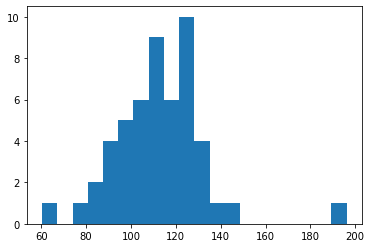

In [240]:
plt.hist(diff * 100, bins=20)

In [241]:
mu = np.average(diff)
sigma = np.sqrt(np.average((diff - mu)**2))
diff_normal = np.random.normal(loc=mu, scale=sigma, size=1000)
diff_normal
mu, sigma

(1.130126199446348, 0.19974221841713302)

(array([0.00288831, 0.        , 0.00288831, 0.00577662, 0.01155324,
        0.01444155, 0.01732986, 0.02599479, 0.01732986, 0.0288831 ,
        0.01155324, 0.00288831, 0.00288831, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00288831]),
 array([ 60.36875288,  67.15744244,  73.94613201,  80.73482157,
         87.52351114,  94.3122007 , 101.10089027, 107.88957983,
        114.67826939, 121.46695896, 128.25564852, 135.04433809,
        141.83302765, 148.62171722, 155.41040678, 162.19909635,
        168.98778591, 175.77647547, 182.56516504, 189.3538546 ,
        196.14254417]),
 <BarContainer object of 20 artists>)

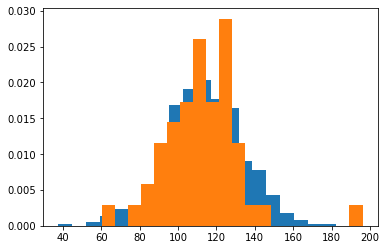

In [242]:
plt.hist(diff_normal * 100, bins=20, density=True)
plt.hist(diff * 100, bins=20, density=True)


In [243]:
random_returns = np.random.choice(diff, 30)
random_returns

array([1.03367805, 0.98401829, 1.19432307, 1.12997874, 1.2671719 ,
       1.26500403, 1.4502217 , 0.93735029, 1.28661753, 1.18876065,
       1.09364301, 1.18876065, 1.02616532, 1.08476726, 1.02616532,
       1.1155335 , 0.93375987, 1.18876065, 1.06800054, 1.12729995,
       1.2671719 , 1.25516294, 1.23128553, 0.92926762, 1.28784249,
       0.93375987, 0.93735029, 1.18876065, 0.97027886, 1.22752879])

In [244]:
start_money = 100 * 1000
add_each_year = 12 * 4000
n_years = 30


n_epochs = 100000 # how many experiments do you run
expt = np.zeros((n_epochs, n_years))
for epoch in range(n_epochs):
    random_returns = np.random.choice(diff_normal, n_years)
    money = start_money
    money_arr = []
    for year in range(n_years):
        
        money *= random_returns[year] 
        money += add_each_year
        money_arr.append(money)
    roi = money - (start_money + add_each_year * n_years)
    expt[epoch] = money_arr
    # print(f"Epoch {epoch}: Final return: {money}. ROI={roi}")
    

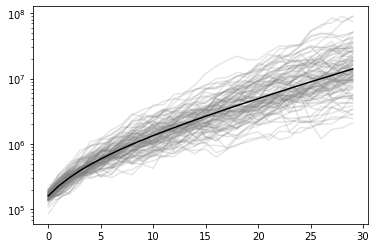

In [245]:
for i in range(100):
    plt.plot(expt[i], ls='-', alpha=0.2, color='grey')
plt.plot(np.median(expt, axis=0), alpha=1, color='black')
plt.yscale("log")

In [246]:
# Average last open
np.median(expt, axis=0)[-1] / 10**6 / 7.45, min(expt[:,-1]), np.median(expt, axis=0)[-1]  / min(expt[:,-1])

(1.8849646952026369, 394012.45478763536, 35.6409722805045)

(100000.0, 1000000.0)

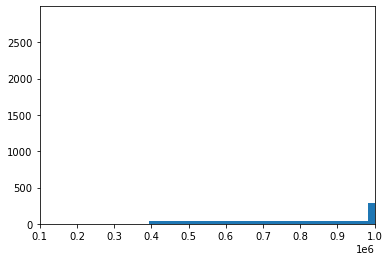

In [247]:
end_year = expt[:,-1]
plt.hist(end_year, bins=1000)
plt.xlim(start_money, start_money * 10)

In [248]:
# What's the probability of earning more than 10x initial money?
total_money_invested = start_money + n_years * add_each_year
fractions = []
rois = []
for frac in range(100):
    fractions.append(frac)
    roi = np.sum(end_year > frac * total_money_invested) / len(end_year)
    rois.append(roi)
    print(f"Fraction={frac}, ROI:{roi}")

Fraction=0, ROI:1.0
Fraction=1, ROI:0.99705
Fraction=2, ROI:0.96901
Fraction=3, ROI:0.91327
Fraction=4, ROI:0.84383
Fraction=5, ROI:0.76997
Fraction=6, ROI:0.69613
Fraction=7, ROI:0.62758
Fraction=8, ROI:0.56493
Fraction=9, ROI:0.50682
Fraction=10, ROI:0.45517
Fraction=11, ROI:0.41003
Fraction=12, ROI:0.36934
Fraction=13, ROI:0.33412
Fraction=14, ROI:0.30183
Fraction=15, ROI:0.27299
Fraction=16, ROI:0.24756
Fraction=17, ROI:0.22501
Fraction=18, ROI:0.20337
Fraction=19, ROI:0.18582
Fraction=20, ROI:0.16973
Fraction=21, ROI:0.15474
Fraction=22, ROI:0.14142
Fraction=23, ROI:0.12952
Fraction=24, ROI:0.11858
Fraction=25, ROI:0.10893
Fraction=26, ROI:0.10021
Fraction=27, ROI:0.09223
Fraction=28, ROI:0.08488
Fraction=29, ROI:0.07865
Fraction=30, ROI:0.07287
Fraction=31, ROI:0.06782
Fraction=32, ROI:0.06282
Fraction=33, ROI:0.05802
Fraction=34, ROI:0.05349
Fraction=35, ROI:0.04978
Fraction=36, ROI:0.04628
Fraction=37, ROI:0.04254
Fraction=38, ROI:0.0397
Fraction=39, ROI:0.03687
Fraction=40, RO

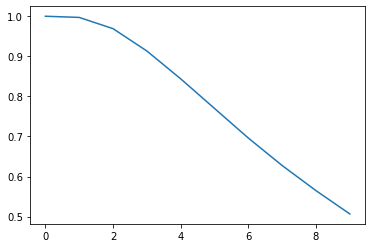

In [249]:
plt.plot(rois[:10])


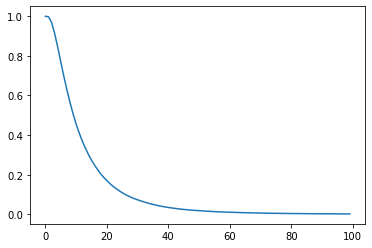

In [250]:
plt.plot(rois)


# Analyze historical data after 1950s, take inflation into consideration

In [251]:
years = []
last_opens = []
for year in range (1950, 2022):
    df_year = df[df["year"] == year]
    last_open = list(df_year["Open"])[-1]
    if last_open < 1:
        continue
    
    years.append(year)
    last_opens.append(last_open)

In [252]:
df_new = pd.DataFrame({"year": years, "last_open": last_opens})
df_new

,year,last_open
0,1950,20.430000
1,1951,23.770000
2,1952,26.570000
3,1953,24.809999
4,1954,35.980000
5,1955,45.480000
6,1956,46.669998
7,1957,39.990002
8,1958,55.209999
9,1959,59.889999


In [253]:
df_new[0:10]

,year,last_open
0,1950,20.430000
1,1951,23.770000
2,1952,26.570000
3,1953,24.809999
4,1954,35.980000
5,1955,45.480000
6,1956,46.669998
7,1957,39.990002
8,1958,55.209999
9,1959,59.889999


In [254]:
price = np.array(df_new["last_open"])
price

array([  20.43000031,   23.77000046,   26.56999969,   24.80999947,
         35.97999954,   45.47999954,   46.66999817,   39.99000168,
         55.20999908,   59.88999939,   58.11000061,   71.55000305,
        140.33999634,  164.86000061,  166.25999451,  210.67999268,
        243.36999512,  247.83999634,  279.39001465,  350.67999268,
        328.70999146,  415.14001465,  438.82000732,  468.66000366,
        461.17001343,  614.11999512,  753.84997559,  970.84002686,
       1231.93005371, 1464.4699707 , 1334.2199707 , 1161.02001953,
        879.39001465, 1109.64001465, 1213.55004883, 1254.42004395,
       1424.70996094, 1475.25      ,  890.59002686, 1126.59997559,
       1256.76000977, 1262.81994629, 1402.43005371, 1842.60998535,
       2082.11010742, 2060.59008789, 2251.61010742, 2689.14990234,
       2498.93994141, 3215.17993164, 3733.27001953, 4775.20996094])

In [255]:
next_price = np.roll(price, -1)[:-1]
current_price = price[:-1]

In [256]:
diff = next_price / current_price
diff

array([1.16348508, 1.11779551, 0.93375987, 1.4502217 , 1.26403558,
       1.02616532, 0.85686744, 1.38059507, 1.08476726, 0.97027886,
       1.23128553, 1.96142544, 1.17471858, 1.00849202, 1.2671719 ,
       1.15516425, 1.0183671 , 1.12729995, 1.25516294, 0.93735029,
       1.26293701, 1.05704098, 1.06800054, 0.98401829, 1.33165639,
       1.22752879, 1.28784249, 1.26893208, 1.18876065, 0.91105997,
       0.87018636, 0.75742881, 1.26182922, 1.09364301, 1.03367805,
       1.13575191, 1.03547391, 0.60368753, 1.26500403, 1.1155335 ,
       1.00482187, 1.11055425, 1.31386944, 1.12997874, 0.98966432,
       1.09270161, 1.19432307, 0.92926762, 1.28661753, 1.16113875,
       1.27909579])

(array([ 1.,  0.,  1.,  2.,  4.,  5.,  6.,  9.,  6., 10.,  4.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 60.36875288,  67.15744244,  73.94613201,  80.73482157,
         87.52351114,  94.3122007 , 101.10089027, 107.88957983,
        114.67826939, 121.46695896, 128.25564852, 135.04433809,
        141.83302765, 148.62171722, 155.41040678, 162.19909635,
        168.98778591, 175.77647547, 182.56516504, 189.3538546 ,
        196.14254417]),
 <BarContainer object of 20 artists>)

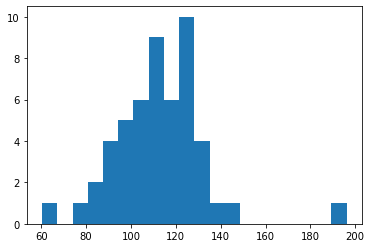

In [257]:
plt.hist(diff * 100, bins=20)

In [258]:
mu = np.average(diff)
sigma = np.sqrt(np.average((diff - mu)**2))
diff_normal = np.random.normal(loc=mu, scale=sigma, size=10000)
diff_normal
mu, sigma

(1.130126199446348, 0.19974221841713302)

(array([0.00288831, 0.        , 0.00288831, 0.00577662, 0.01155324,
        0.01444155, 0.01732986, 0.02599479, 0.01732986, 0.0288831 ,
        0.01155324, 0.00288831, 0.00288831, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00288831]),
 array([ 60.36875288,  67.15744244,  73.94613201,  80.73482157,
         87.52351114,  94.3122007 , 101.10089027, 107.88957983,
        114.67826939, 121.46695896, 128.25564852, 135.04433809,
        141.83302765, 148.62171722, 155.41040678, 162.19909635,
        168.98778591, 175.77647547, 182.56516504, 189.3538546 ,
        196.14254417]),
 <BarContainer object of 20 artists>)

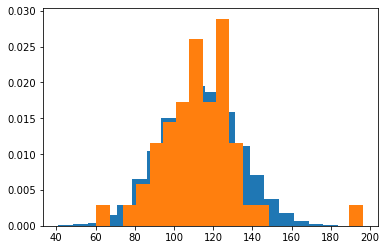

In [259]:
plt.hist(diff_normal * 100, bins=20, density=True)
plt.hist(diff * 100, bins=20, density=True)


In [260]:
random_returns = np.random.choice(diff, 30)
random_returns

array([1.2671719 , 1.0183671 , 1.13575191, 1.26293701, 1.03367805,
       1.26293701, 1.28661753, 1.27909579, 1.12997874, 1.28661753,
       1.19432307, 1.33165639, 1.26182922, 1.28661753, 1.00482187,
       1.12997874, 1.28784249, 1.16348508, 1.31386944, 1.00482187,
       0.91105997, 0.98966432, 1.09270161, 1.4502217 , 1.03367805,
       1.16113875, 1.09270161, 1.05704098, 1.17471858, 1.13575191])

In [261]:
start_money = 150 * 1000
add_each_year_start = 12 * 4000 * 0
add_money_total = 0
n_years = 40


n_epochs = 100000 # how many experiments do you run
expt = np.zeros((n_epochs, n_years))
for epoch in range(n_epochs):
    random_returns = np.random.choice(diff_normal, n_years)
    money = start_money
    money_arr = []
    add_money_total = 0
    add_each_year = add_each_year_start
    for year in range(n_years):
        
        money *= random_returns[year] 
        add_each_year *= 1.03
        money += add_each_year
        add_money_total += add_each_year
        money_arr.append(money)
    roi = money - (start_money + add_money_total)
    expt[epoch] = money_arr
    # print(f"Epoch {epoch}: Final return: {money}. ROI={roi}")
    

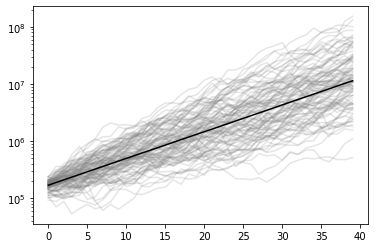

In [262]:
for i in range(100):
    plt.plot(expt[i], ls='-', alpha=0.2, color='grey')
plt.plot(np.median(expt, axis=0), alpha=1, color='black')
plt.yscale("log")

In [263]:
# Average last open
np.median(expt, axis=0)[-1] / 10**6 / 7.45, min(expt[:,-1]), np.median(expt, axis=0)[-1]  / min(expt[:,-1])

(1.5303863060955347, 41395.94730464767, 275.42256483478667)

(150000.0, 6000000.0)

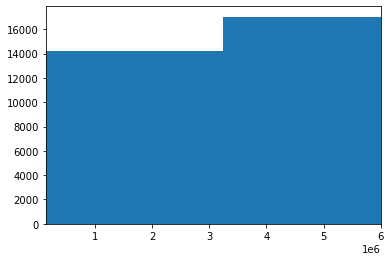

In [264]:
end_year = expt[:,-1]
plt.hist(end_year, bins=1000)
plt.xlim(start_money, start_money * 40)

In [265]:
# What's the probability of earning more than 10x initial money?
total_money_invested = start_money + add_money_total
fractions = []
rois = []
for frac in range(100):
    fractions.append(frac)
    roi = np.sum(end_year > frac * total_money_invested) / len(end_year)
    rois.append(roi)
    print(f"Fraction={frac}, ROI:{roi}")

Fraction=0, ROI:1.0
Fraction=1, ROI:0.99984
Fraction=2, ROI:0.99889
Fraction=3, ROI:0.99643
Fraction=4, ROI:0.99291
Fraction=5, ROI:0.98879
Fraction=6, ROI:0.98344
Fraction=7, ROI:0.97781
Fraction=8, ROI:0.97166
Fraction=9, ROI:0.96476
Fraction=10, ROI:0.95738
Fraction=11, ROI:0.95019
Fraction=12, ROI:0.94184
Fraction=13, ROI:0.93435
Fraction=14, ROI:0.92607
Fraction=15, ROI:0.9178
Fraction=16, ROI:0.90881
Fraction=17, ROI:0.89931
Fraction=18, ROI:0.89067
Fraction=19, ROI:0.88125
Fraction=20, ROI:0.87239
Fraction=21, ROI:0.8634
Fraction=22, ROI:0.8544
Fraction=23, ROI:0.84604
Fraction=24, ROI:0.83683
Fraction=25, ROI:0.82815
Fraction=26, ROI:0.81939
Fraction=27, ROI:0.81067
Fraction=28, ROI:0.80242
Fraction=29, ROI:0.79417
Fraction=30, ROI:0.78581
Fraction=31, ROI:0.77759
Fraction=32, ROI:0.76989
Fraction=33, ROI:0.76194
Fraction=34, ROI:0.75366
Fraction=35, ROI:0.74552
Fraction=36, ROI:0.73763
Fraction=37, ROI:0.72984
Fraction=38, ROI:0.72261
Fraction=39, ROI:0.71591
Fraction=40, ROI:

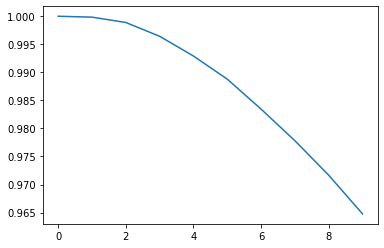

In [266]:
plt.plot(rois[:10])


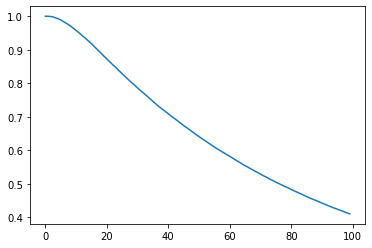

In [267]:
plt.plot(rois)
